In [1]:
import pandas as pd
import numpy as np
import os
import scipy
import itertools
import seaborn as sns
import matplotlib.pyplot as plt    
import xgboost as xgb
iv=['np'    , 'os'     ,'pd'    , 'plt'     ,'tqdm'    , 'train'     ,'train_date'      , 'train_num' ,'data'    ]
def memchk(iv):
    import sys,operator
    ipython_vars=iv
    ,'warnings'    , 'xgboost']
    print sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
    return sorted([{i:sys.getsizeof(globals().get(i))/1000000.0} for i in ipython_vars])
%matplotlib inline
from sklearn.metrics import confusion_matrix
import warnings
%load_ext autotime
warnings.filterwarnings('ignore')
from tqdm import tqdm
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
plt.style.use('classic')
from contigency import Ttable,table, plot 
from sklearn.linear_model import LinearRegression

C:\Users\sushant\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.linear_model import LinearRegression

time: 3 ms


In [3]:
data = pd.read_csv(r'C:\Users\sushant\Documents\Datasets\NYC\data_clean_eda.csv')#.drop('Unnamed: 0',1)

time: 23.7 s


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083778 entries, 0 to 2083777
Data columns (total 24 columns):
dropoff_datetime         object
dropoff_latitude         float64
dropoff_longitude        float64
id                       object
passenger_count          int64
pickup_datetime          object
pickup_latitude          float64
pickup_longitude         float64
store_and_fwd_flag       object
trip_duration            float64
vendor_id                int64
dropoff_datetimeyear     float64
dropoff_datetimemonth    float64
dropoff_datetimeday      float64
dropoff_datetimehour     float64
dropoff_datetimedate     object
pickup_datetimeyear      int64
pickup_datetimemonth     int64
pickup_datetimeday       int64
pickup_datetimehour      int64
pickup_datetimedate      object
Train                    int64
Valid                    int64
distance                 float64
dtypes: float64(10), int64(8), object(6)
memory usage: 381.6+ MB
time: 1.13 s


In [5]:
print 'Categorical'
cat_var= data.select_dtypes(include = ['object']).columns.values.tolist()
print cat_var
print '\nNumerical Variables'
num_var = data.select_dtypes(include = ['int64','float64']).columns.values.tolist()
print num_var

Categorical
['dropoff_datetime', 'id', 'pickup_datetime', 'store_and_fwd_flag', 'dropoff_datetimedate', 'pickup_datetimedate']

Numerical Variables
['dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'pickup_latitude', 'pickup_longitude', 'trip_duration', 'vendor_id', 'dropoff_datetimeyear', 'dropoff_datetimemonth', 'dropoff_datetimeday', 'dropoff_datetimehour', 'pickup_datetimeyear', 'pickup_datetimemonth', 'pickup_datetimeday', 'pickup_datetimehour', 'Train', 'Valid', 'distance']
time: 1.9 s


In [6]:
subm=data[data['Train']==0][['id']]

time: 648 ms


In [7]:
data=data[num_var+['store_and_fwd_flag']]

time: 231 ms


In [8]:
train=data[data['Valid']==0]
valid=data[data['Valid']==1]

time: 227 ms


In [9]:
train=train.drop(['Train','Valid'],1)
valid=valid.drop(['Train','Valid'],1)

time: 161 ms


In [10]:
train['vendor_id']=train['vendor_id'].astype(object)
train=pd.get_dummies(train)
valid['vendor_id']=valid['vendor_id'].astype(object)
valid=pd.get_dummies(valid)

time: 2.97 s


In [11]:
train.info(), valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166915 entries, 291729 to 1458643
Data columns (total 19 columns):
dropoff_latitude         1166915 non-null float64
dropoff_longitude        1166915 non-null float64
passenger_count          1166915 non-null int64
pickup_latitude          1166915 non-null float64
pickup_longitude         1166915 non-null float64
trip_duration            1166915 non-null float64
dropoff_datetimeyear     1166915 non-null float64
dropoff_datetimemonth    1166915 non-null float64
dropoff_datetimeday      1166915 non-null float64
dropoff_datetimehour     1166915 non-null float64
pickup_datetimeyear      1166915 non-null int64
pickup_datetimemonth     1166915 non-null int64
pickup_datetimeday       1166915 non-null int64
pickup_datetimehour      1166915 non-null int64
distance                 1166915 non-null float64
vendor_id_1              1166915 non-null uint8
vendor_id_2              1166915 non-null uint8
store_and_fwd_flag_N     1166915 non-null uint

(None, None)

time: 1.26 s


In [12]:
target=train['trip_duration']
valid_target=valid[['trip_duration']]

time: 10 ms


In [13]:
train=train.drop('trip_duration',1)
valid=valid.drop('trip_duration',1)

time: 101 ms


In [14]:
lr=LinearRegression()

time: 2 ms


In [15]:
lr.fit(train,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

time: 4.42 s


In [16]:
#valid_target[]

time: 23 ms


In [17]:
valid_target['pred']=lr.predict(valid)

time: 11.5 s


In [18]:
valid_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291729 entries, 0 to 291728
Data columns (total 2 columns):
trip_duration    291729 non-null float64
pred             291729 non-null float64
dtypes: float64(2)
memory usage: 6.7 MB
time: 14 ms


In [19]:
valid_target['pred']=np.round(valid_target['pred'],2)

time: 176 ms


In [20]:
len(valid_target[valid_target['pred']<0]),len(valid_target)

(31, 291729)

time: 7 ms


In [21]:
valid_target=valid_target[valid_target['pred']>0]

time: 38 ms


In [22]:
def rmsle(predicted,real):
    sum1=0.0
    print len(predicted)
    for x in xrange(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum1 = sum1 + (p - r)**2
    print sum1
    return (sum1/len(predicted))**0.5

time: 74 ms


In [23]:
rmsle(np.array(valid_target['pred']),np.array(valid_target['trip_duration']))

291698
982956.949352


1.8356949915032961

time: 1.12 s


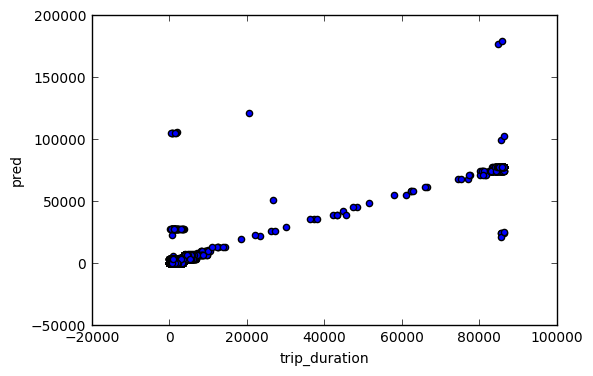

time: 6.66 s


In [24]:
valid_target.plot(x='trip_duration',y='pred',kind='scatter')

In [25]:
.

SyntaxError: invalid syntax (<ipython-input-25-8cf8463b34ca>, line 1)

In [66]:
train=data[data['Train']==1]
test=data[data['Train']==0]

time: 1.96 s


In [67]:
train=train.drop(['Train','Valid'],1)
test=test.drop(['Train','Valid'],1)

time: 249 ms


In [68]:
train['vendor_id']=train['vendor_id'].astype(object)
train=pd.get_dummies(train)
test['vendor_id']=test['vendor_id'].astype(object)
test=pd.get_dummies(test)

time: 2.41 s


In [69]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
dropoff_latitude         1458644 non-null float64
dropoff_longitude        1458644 non-null float64
passenger_count          1458644 non-null int64
pickup_latitude          1458644 non-null float64
pickup_longitude         1458644 non-null float64
trip_duration            1458644 non-null float64
dropoff_datetimeyear     1458644 non-null float64
dropoff_datetimemonth    1458644 non-null float64
dropoff_datetimeday      1458644 non-null float64
dropoff_datetimehour     1458644 non-null float64
pickup_datetimeyear      1458644 non-null int64
pickup_datetimemonth     1458644 non-null int64
pickup_datetimeday       1458644 non-null int64
pickup_datetimehour      1458644 non-null int64
distance                 1458644 non-null float64
vendor_id_1              1458644 non-null uint8
vendor_id_2              1458644 non-null uint8
store_and_fwd_flag_N     1458644 non-null uint8
sto

(None, None)

time: 3.41 s


In [70]:
test=test.drop(['dropoff_datetimeyear',
 'dropoff_datetimemonth',
 'dropoff_datetimeday',
 'dropoff_datetimehour'],1)

time: 63 ms


In [71]:
train=train.drop(['dropoff_datetimeyear',
 'dropoff_datetimemonth',
 'dropoff_datetimeday',
 'dropoff_datetimehour'],1)

time: 344 ms


In [72]:
target=train[['trip_duration']]
#valid_target=valid[['trip_duration']]

time: 212 ms


In [73]:
train=train.drop('trip_duration',1)
test=test.drop('trip_duration',1)

time: 117 ms


In [74]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
dropoff_latitude        1458644 non-null float64
dropoff_longitude       1458644 non-null float64
passenger_count         1458644 non-null int64
pickup_latitude         1458644 non-null float64
pickup_longitude        1458644 non-null float64
pickup_datetimeyear     1458644 non-null int64
pickup_datetimemonth    1458644 non-null int64
pickup_datetimeday      1458644 non-null int64
pickup_datetimehour     1458644 non-null int64
distance                1458644 non-null float64
vendor_id_1             1458644 non-null uint8
vendor_id_2             1458644 non-null uint8
store_and_fwd_flag_N    1458644 non-null uint8
store_and_fwd_flag_Y    1458644 non-null uint8
dtypes: float64(5), int64(5), uint8(4)
memory usage: 128.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 625134 entries, 1458644 to 2083777
Data columns (total 14 columns):
dropoff_latitude        625134 non-null

(None, None)

time: 822 ms


In [75]:
lr=LinearRegression()

time: 2 ms


In [76]:
from sklearn import cross_validation

time: 2 ms


In [82]:
#Simple K-Fold cross validation. 10 folds.
cv = cross_validation.KFold(len(train), n_folds=10)
results = []
# "Error_function" can be replaced by the error function of your analysis
for traincv, testcv in cv:
        temp=target[['trip_duration']].iloc[testcv]
        temp['predic'] = lr.fit(train.iloc[traincv], target['trip_duration'].iloc[traincv]).predict(train.iloc[testcv])
        temp=temp[temp['predic']>=0]
        results.append( rmsle(np.array(temp['predic']),np.array(temp['trip_duration'])) )
print "Results: " + str(np.array(results).mean())

145860
69577.1508726
145864
67270.2193809
145863
69395.2832356
145859
68976.5561392
145857
69601.9860534
145849
69514.3707301
145861
67695.1049285
145861
69567.3729655
145860
69357.4106829
145859
69787.1441412
Results: 0.688150204103
time: 17.9 s


In [85]:
results,np.mean(results)

([0.69066144951667607,
  0.67910567941162725,
  0.68975110603423462,
  0.68767642757275482,
  0.69079180644421445,
  0.69037581667351067,
  0.68125395962459612,
  0.69061054997247273,
  0.68956995544569077,
  0.69170529033350225],
 0.68815020410292793)

time: 5 ms


In [86]:
#temp=target[['trip_duration']].iloc[testcv]
subm['trip_duration'] = lr.fit(train, target['trip_duration']).predict(test)

time: 1.38 s


In [93]:
target['trip_duration'].mean()

959.49227296036588

time: 20 ms


In [97]:
subm['trip_duration'][subm['trip_duration']<0]=target['trip_duration'].mean()

time: 385 ms


In [98]:
subm[subm['trip_duration']<0]

,id,trip_duration


time: 53 ms


In [99]:
subm.to_csv(r'C:\Users\sushant\Documents\Datasets\NYC\Sub_1stLinearModel.csv',index=False)

time: 872 ms


In [25]:
#data.to_csv(r'C:\Users\sushant\Documents\Datasets\NYC\data_clean.csv',index=False)

time: 1 ms


In [32]:
printmd('### Validation Err\n# %f'%float(rmsle(pred['mean_pred'],pred['trip_duration'])))

### Validation Err
# 0.891920

time: 9.85 s
